In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
a = np.array([1, 0, 1, 11, 12])
b = np.array([0, 12, 5, 2, 3])
c = np.array([1, 1, 0, 10, 10])

In [3]:
np.dot(a,b)/(np.linalg.norm(a) * np.linalg.norm(b))

0.2857914453164686

In [4]:
np.dot(a,c)/(np.linalg.norm(a) * np.linalg.norm(c))

0.9946737675652874

# Word Embeddings 
The code in this file is from the code available on the website for CS 224n (NLP with Deep Learning) at Stanford taught by Chris Manning

Check out the Glove Vectors project at https://nlp.stanford.edu/projects/glove/

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec


In [8]:
glove_file = datapath('/Users/yanivbronshtein/Coding/Rutgers/NLP_Rutgers_Repo/data/HW3_data/glove.6B.100d.txt')
word2vec_text_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_text_file)

/Users/yanivbronshtein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  This is separate from the ipykernel package so we can avoid doing imports until


(400001, 100)

In [9]:
model = KeyedVectors.load_word2vec_format(word2vec_text_file)

In [10]:
model.most_similar('lincoln')

[('franklin', 0.7154849171638489),
 ('jefferson', 0.7120813727378845),
 ('roosevelt', 0.6347461938858032),
 ('monroe', 0.6291372179985046),
 ('springfield', 0.6175090670585632),
 ('kennedy', 0.6164120435714722),
 ('memorial', 0.6071286797523499),
 ('ford', 0.6018675565719604),
 ('abraham', 0.5955190658569336),
 ('massachusetts', 0.592166006565094)]

In [11]:
model.most_similar(negative='lincoln')

[('remineralization', 0.5470089912414551),
 ('phenomenom', 0.5363348722457886),
 ('htlv-1', 0.5344794392585754),
 ('ah1n1', 0.5341301560401917),
 ('kaliopate', 0.531902551651001),
 ('chut', 0.5303452014923096),
 ('nande', 0.5283879637718201),
 ('elg', 0.5258485078811646),
 ('truncus', 0.5256128907203674),
 ('on-course', 0.5241877436637878)]

In [12]:
model.most_similar?

In [13]:
def analogy(x1, x2, y):
    result = model.most_similar(positive=[y,x2], negative=[x1])
    return result[0][0]

In [14]:
analogy('man', 'woman', 'king')

'queen'

In [15]:
analogy('america', 'mississippi', 'china')

'guangxi'

In [16]:
analogy('india', 'ganges', 'china')

'yangtze'

In [17]:
analogy('japan', 'japanese', 'china')

'chinese'

In [18]:
analogy('japan', 'japanese', 'america')

'american'

In [19]:
analogy('japan', 'japanese', 'australia')

'australian'

In [20]:
analogy('coffee', 'mug', 'water')

'splashes'

In [21]:
analogy('australia', 'beer', 'france')

'champagne'

In [22]:
analogy('long', 'longest', 'tall')

'tallest'

In [23]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


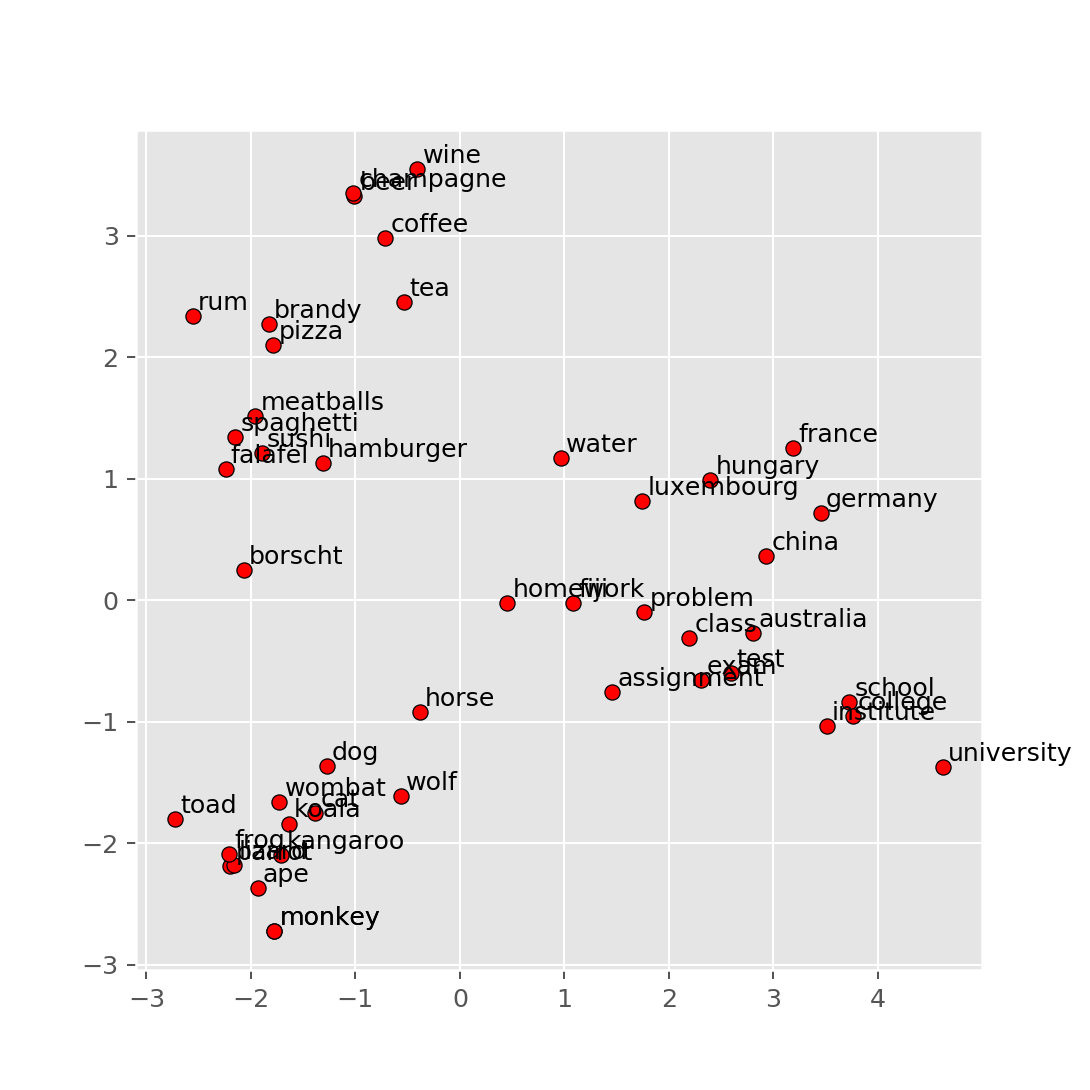

In [24]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>


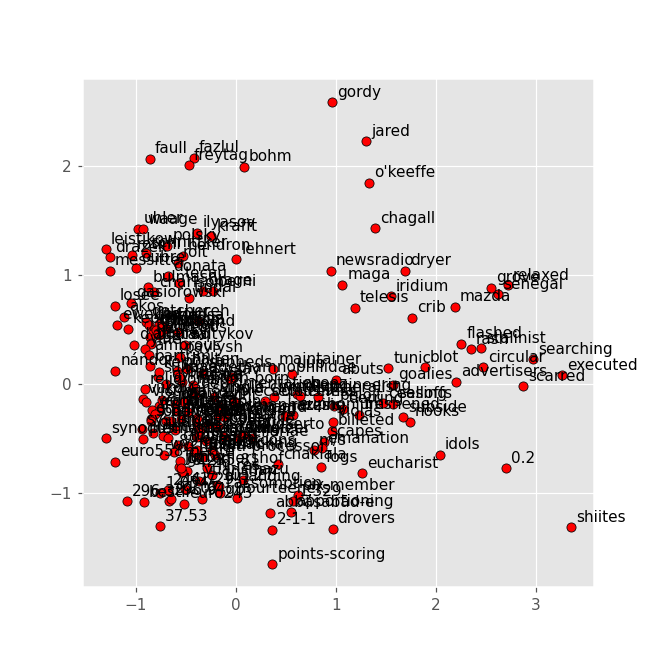

In [19]:
display_pca_scatterplot(model, sample=200)